In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from numpy import linalg as LA
import pandas as pd
#from load_data_mongoloids import load_data_mongoloids
#from mongoloids_config import config

#from load_data_cancer import load_data_cancer
#from cancer_config import config
import re
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
#import plotly.plotly as py
import textwrap
import scipy.stats as stats

from sklearn import svm, datasets
from scipy import stats
from sklearn import neighbors, ensemble, linear_model, neural_network
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import scipy

from infrastructure.configuration import param
import matplotlib.pylab as pylab
import seaborn
seaborn.set_style('darkgrid', {'legend.frameon':True})
fontsize = 20
params = {'legend.fontsize': fontsize,
  'figure.figsize': (18, 15),
  'axes.labelsize': fontsize,
  'axes.titlesize':fontsize,
  'xtick.labelsize':fontsize,
  'ytick.labelsize':fontsize,
  'font.size':fontsize}
pylab.rcParams.update(params)
plt.rc('axes', labelsize=fontsize) 

plt.style.use('ggplot')
%matplotlib inline

import igraph
import cairo

In [2]:
from configurations.load_data_down_GSE52588 import load_data_down_GSE52588_cpgs
from configurations.config_down_GSE52588_cpg import config

In [2]:

#from configurations.load_data_down_GSE52588 import load_data_down_GSE52588_cpgs
#from configurations.config_down_GSE52588_cpg import config

X, y, mask, genes_names = load_data_down_GSE52588()

Data loaded:  1.8364357979999992
float32 (15024, 87)
(87, 15024) 15024


In [29]:
x = float(0.1)
print("{:g}".format(x), str(x))

0.1 0.1


In [40]:
from load_parenclitics import load_parenclitics
from transform_data import parenclitic_feature_names
parenclitics = load_parenclitics(config, by_sample = True, id_thr = 5)
#print (parenclitics)
is_lists = True
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
if is_lists:
    parenclitics = parenclitics.select_dtypes(exclude=numerics) # includ exclude
    parenclitics = parenclitics.drop(columns = ["eigenvalues_intervals_normalized", "eigenvalues_intervals", "IPR", "weights", "eigenvalues"])
else:
    parenclitics = parenclitics.select_dtypes(include=numerics) # includ exclude
    parenclitics = parenclitics.drop(columns = ["mean_pagerank", "max_degrees", "max_closeness"])
#print parenclitics
#parenclitics = parenclitics[:29]

#parenclitics = parenclitics.drop(columns = ["std_weights", "max_weights", "mean_weights", "mean_pagerank", "mean_closeness", "max_closeness"])


#
#print parenclitics.columns.values, len(parenclitics.columns.values)
parenclitic_names = parenclitic_feature_names()
parenclitic_names = [parenclitic_names[name] for name in parenclitics.columns.values]
#ids = [0,7,11,15,16,17,18]
#parenclitic_names = np.delete(np.array(parenclitic_names), ids)

#parenclitics = parenclitics.drop(columns = parenclitics.columns[ids])

parenclitics.columns = range(len(parenclitics.columns))

In [39]:
print (parenclitic_names)

{'degrees': 'Degrees', 'min_degrees': 'Min degrees', 'max_degrees': 'Max degrees', 'mean_degrees': 'Mean degrees', 'std_degrees': 'Std degrees', 'efficiency': 'Efficiency', 'betweenness': 'Betweenness', 'min_betweenness': 'Min betweenness', 'max_betweenness': 'Max betweenness', 'mean_betweenness': 'Mean betweenness', 'std_betweenness': 'Std betweenness', 'closeness': 'Closeness', 'min_closeness': 'Min closeness', 'max_closeness': 'Max closeness', 'mean_closeness': 'Mean closeness', 'std_closeness': 'Std closeness', 'pagerank': 'Pagerank', 'min_pagerank': 'Min pagerank', 'max_pagerank': 'Max pagerank', 'mean_pagerank': 'Mean pagerank', 'std_pagerank': 'Std pagerank', 'eigenvalues': 'Eigenvalues', 'min_eigenvector_centrality': 'Min eigenvector centrality', 'max_eigenvector_centrality': 'Max eigenvector centrality', 'mean_eigenvector_centrality': 'Mean eigenvector centrality', 'std_eigenvector_centrality': 'Std eigenvector centrality', 'num_edges': 'Number of edges', 'eigenvalues_interval

In [6]:
import pandas as pd
phenotype_df = pd.read_csv("../../../data/Down_phenotype/DOWN_FENOTIPO_No4,8,12_PerCorrelazioni.tsv", delimiter = '\t')

In [17]:
print phenotype_df.shape
mask = (phenotype_df.isnull().sum() == 0)
phenotype_df_good = phenotype_df[mask.index[mask]]
#print phenotype_df_good

from sklearn.impute import SimpleImputer
df = pd.DataFrame(phenotype_df)
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df)
phenotype_df_imputed = pd.DataFrame(imp.transform(df))
phenotype_df_imputed.columns = phenotype_df.columns

(29, 125)


In [5]:
from sklearn.decomposition import PCA

df = pd.DataFrame(phenotype_df)
df = df.drop(['codicePID'], axis=1)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df)

'''
df = pd.DataFrame(parenclitics)
#print df

df = (df - df.mean()) / df.std()
num_components = 10
pca = PCA(n_components=num_components, svd_solver='full')
pca.fit(df)

columns = ['pca_%i' % i for i in range(num_components)]
df_pca = pd.DataFrame(pca.transform(df), columns=columns, index=df.index)
df_pca
'''

feature_names = ["categoriaDSQIID", "fluenzaverbale","ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "fluenzafonemica", "F.A.B."]
'''
for feature_name in feature_names:
    plt.figure()
    plt.scatter(df_pca["pca_0"], df_pca["pca_4"], c = phenotype_df[feature_name], cmap= 'jet')
'''

'\nfor feature_name in feature_names:\n    plt.figure()\n    plt.scatter(df_pca["pca_0"], df_pca["pca_4"], c = phenotype_df[feature_name], cmap= \'jet\')\n'

In [21]:
from sklearn import svm, datasets
from scipy import stats
from sklearn import neighbors, ensemble
from sklearn.model_selection import cross_val_score

data = parenclitics
data = data[:29].values
data = stats.zscore(data)

np.set_printoptions(linewidth=100, formatter={'int':lambda x: "{:2d}".format(x), 'float':lambda x: "{:.2f}".format(x)})
feature_names = ["categoriaDSQIID", "fluenzaverbale","ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "fluenzafonemica", "F.A.B."]
for feature_name in feature_names:
    print feature_name
    feature = (phenotype_df[feature_name].values)
    cur = data[~np.isnan(feature)]
    feature = feature[~np.isnan(feature)].astype('int')
    if (feature == 0).sum() < 3:
        continue
    #feature = (feature > np.median(feature)).astype('int')
    
    #print np.nan_to_num(phenotype_df[feature_name].values, -1).astype('int'), 'source'
    print feature, 'good'
    clfs = [svm.SVC(kernel = 'rbf', C = 1, class_weight = "balanced"), 
            neighbors.KNeighborsClassifier(n_neighbors = 2),
            svm.LinearSVC(C = 1, class_weight = "balanced"),
            ensemble.RandomForestClassifier(n_estimators = 4)]

    for clf in clfs:
        score = cross_val_score(clf, cur, feature, cv=5).mean()
        clf.fit(cur, feature)
        predicted = clf.predict(cur)
        score2 = clf.score(cur, feature)
        val = float(np.bincount(feature).max()) / len(feature)
        print predicted, "{:.2f}".format(score), "{:.2f}".format(val), "{:.2f}".format(score2), type(clf).__name__

categoriaDSQIID
[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0  1  0  0  1  0  0  0  0] good
[ 0  0  0  0  1  0  0  0  0  1  0  1  0  0  1  0  0  0  0  1  0  1  0  1  0  0  0  0  0] 0.62 0.79 0.83 SVC
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0] 0.80 0.79 0.83 KNeighborsClassifier
[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  1  1  0  1  0  0  1  0  1] 0.49 0.79 0.76 LinearSVC
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  1  0  0  0  0] 0.76 0.79 0.90 RandomForestClassifier
fluenzaverbale
[ 0  1  1  0  1  1  0  0  0  1  0  1  1  2  0  0  1  0  2  0  0  0  0  0  2] good
[ 1  1  1  0  1  1  1  1  0  1  1  1  1  2  1  0  1  0  2  0  1  1  0  1  2] 0.35 0.56 0.68 SVC
[ 0  0  1  0  0  0  0  0  0  0  0  1  1  2  0  0  1  0  1  0  0  0  0  0  0] 0.63 0.56 0.76 KNeighborsClassifier


C:\Users\mike_live\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mike_live\Anaconda2\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mike_live\Anaconda2\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mike_live\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), 

[ 1  1  0  0  0  0  0  0  0  0  1  1  1  2  1  0  1  0  2  0  0  1  0  0  2] 0.40 0.56 0.68 LinearSVC
[ 0  1  1  1  1  1  0  0  0  1  0  1  1  2  0  0  0  0  2  0  0  0  0  0  2] 0.53 0.56 0.92 RandomForestClassifier
ABCiperattivita
[ 5  0 12  1  0  0  3  2  9  1  0  3 43  2  2  2  0  2  0  0  1  1  0  0  2  0  0  2] good
[ 5  5 12  0  2  0  9  9  9  1  2  3 43  9  2  2 43  2  2  0  1  1  2  2 43  1 43  5] 0.15 0.39 0.46 SVC
[ 0  0 12  1  0  0  0  0  3  1  0  1  2  2  2  0  0  1  0  0  1  1  0  0  2  0  0  2] 0.35 0.39 0.71 KNeighborsClassifier
[ 5  5 12  0  2  0  3  0  9  1  1  3 43  2  2  2 43  0  0  0  1  1  2  0  2  0  0  2] 0.15 0.39 0.71 LinearSVC


C:\Users\mike_live\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[ 5  0 12  1  0  0  3  2  9  1  0  3  2  2  2  2  0  2  0  0  1  1  0  0  2  0  0  2] 0.27 0.39 0.96 RandomForestClassifier
ABCIrritabilita
[ 0  1  5  2  0  0  0  3  0  0  0  1  8 16  0  0  0  0  0  1  6  3  4  0  0  0  0  3] good
[ 5  2  5  2 16  2  0  0  8  3  0  1  8 16  0  4  4  2  2  1  6  3  4  0  8  0  8  3] 0.11 0.57 0.54 SVC
[ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0] 0.53 0.57 0.64 KNeighborsClassifier
[ 2  1  5  2  3  0  0  0  8  1  0  1  8 16  0  0  1  0  0  1  6  3  4  0  0  0  0  3] 0.18 0.57 0.79 LinearSVC
[ 0  1  0  0  0  0  0  0  0  0  0  1  8 16  0  0  0  0  0  1  6  1  4  0  0  0  0  3] 0.59 0.57 0.86 RandomForestClassifier
ABCletargia
[17  5  0  9 27  0  2  2 10 17  6 13  0  2 14  1  6 13  0 16  0 13  0  2  0  3  1  3] good
[ 5  5  0  9 27  0  0  0  0 13  0 13  0  2 14  0  0  0  0 16 13 13  0  0  0  3  0  3] 0.10 0.25 0.57 SVC
[ 5  5  0  9  2  0  2  2  2 13  6 13  0  2  2  0  0  9  0 13  0 13  0  2  0  0  1  3] 0.54 0.25 0.6

C:\Users\mike_live\Anaconda2\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[ 0  0  3  0  0  6  6  6  0  3  0  0  9  0  0 14  0  0  0  0  3  0  0  6  9  0  0  0] 0.08 0.29 0.54 KNeighborsClassifier
[ 9  9  9  8  3 19  9  6  9  5  7  2  9  0 20 14  8  8  0  7  3 20  0  6  9  0  9 20] 0.11 0.29 0.79 LinearSVC
[ 0  0  0  8  3 19  9  6  0  5  7  2  9  0 20 14  0  8  0  7  3  0  0  6  9  0  6  9] 0.39 0.29 0.82 RandomForestClassifier
F.A.B.


In [42]:
#"categoriaDSQIID", "fluenzaverbale","ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "fluenzafonemica", "F.A.B."
data = parenclitics
#data = data[:29]
data = data.values
#data = stats.zscore(data)
from matplotlib.backends.backend_pdf import PdfPages
feature_name = "ABCinappropriatespeech"
df_ans = None
#parenclitic_pairs_path = config.ofname([["parenclitic_pairs"]], ext = ".pdf", 
#                                     include_set = config.params_sets["parenclitic_boxplots"])
    
#with PdfPages(parenclitic_pairs_path) as pdf:
#with 1 as pdf:
for id1_parenclitic in range(data.shape[1]):
    for id2_parenclitic in range(data.shape[1]):
        if id1_parenclitic == id2_parenclitic: 
            continue
        id_parenclitic = [id1_parenclitic, id2_parenclitic]
        print (parenclitic_names[id1_parenclitic], parenclitic_names[id2_parenclitic])
        #cur = data[:, id_parenclitic]
        #val = np.arctan2(cur[:, 0] - cur[0, 0], cur[:, 1] - cur[0, 1]) % np.pi
        #print val[val != 0] #(cur[:, 0] - cur[0, 0].min()) / (cur[:, 1] - cur[:, 1].min())
        #if np.std(val[val != 0]) < 1e-3:
        #    continue

        #cur = cur[:29]

        #feature = np.reshape(y == 0, -1)

        #u = np.reshape(np.array(parenclitics[id1_parenclitic][29:58]).tolist(), -1)
        #v = np.reshape(np.array(parenclitics[id2_parenclitic][29:58]).tolist(), -1)
        #print(u.shape, u.dtype)

        plt.figure(figsize = (7, 5))
        plt.figure()
        u1 = np.reshape(np.array(parenclitics[id1_parenclitic][:29]).tolist(), -1)
        v1 = np.reshape(np.array(parenclitics[id2_parenclitic][:29]).tolist(), -1)

        u2 = np.reshape(np.array(parenclitics[id1_parenclitic][29:58]).tolist(), -1)
        v2 = np.reshape(np.array(parenclitics[id2_parenclitic][29:58]).tolist(), -1)

        u = np.concatenate([u1, u2])
        v = np.concatenate([v1, v2])
        colors = np.zeros_like(u)
        colors[:len(u1)] = 1

        plt.scatter(u, v, c = colors, rasterized = True, alpha = 0.1, cmap = plt.get_cmap('jet', 2))

        #plt.scatter(u, v, c = np.reshape(feature, -1), 
        #            cmap = plt.get_cmap('jet', feature.max() - feature.min() + 1))
        plt.xlabel(parenclitic_names[id1_parenclitic].capitalize(), fontsize = fontsize)
        plt.ylabel(parenclitic_names[id2_parenclitic].capitalize(), fontsize = fontsize)
        delta = (u.max() - u.min()) * 0.05
        plt.xlim(u.min() - delta, u.max() + delta)

        delta = (v.max() - v.min()) * 0.05
        plt.ylim(v.min() - delta, v.max() + delta)
        plt.subplots_adjust(bottom=0.2, top=0.9, left=0.25, right=0.95)
        #plt.yscale('log')

        #plt.title(feature_name, fontsize = fontsize)
        #plt.colorbar()
        #pdf.savefig(dpi = 300)
        parenclitic_pairs_path = config.ofname([["parenclitic_pairs_full"], [parenclitic_names[id1_parenclitic], parenclitic_names[id2_parenclitic]]], ext = ".png", 
                                 include_set = config.params_sets["parenclitic_boxplots"])
        plt.savefig(parenclitic_pairs_path)
        #plt.show()
        plt.close()
        #sdf
        continue


        feature = (phenotype_df[feature_name].values)
        feature = feature[:29]

        mask = ~np.isnan(feature)
        #cur = cur[mask]
        u = u[mask]
        v = v[mask]
        cur = cur[mask]
        #cur = cur.reshape(-1, 1)
        feature = feature[mask].astype('int')
        feature = np.minimum(feature, 12)
        #if (feature == 0).sum() < 3:
        #    continue
        #feature = (feature > np.median(feature)).astype('int')

        #print np.nan_to_num(phenotype_df[feature_name].values, -1).astype('int'), 'source'
        #print feature, 'good'
        clfs = [svm.SVC(kernel = 'rbf', C = 1, class_weight = "balanced"), 
                neighbors.KNeighborsClassifier(n_neighbors = 2),
                svm.LinearSVC(C = 1, class_weight = "balanced"),
                ensemble.RandomForestClassifier(n_estimators = 4)]
        df_cur = pd.DataFrame(index=[0])

        #df_ans[parenclitic_names[id_parenclitic]] = parenclitics[id_parenclitic]
        #df_ans["input"] = cur
        #df_ans["good"] = feature
        #'''

        #plt.scatter(np.reshape(parenclitics[id_parenclitic], -1), np.reshape(np.zeros_like(cur), -1), c = np.reshape(feature, -1), cmap = 'jet')
        #'''
        df_cur['parenclitic_1'] = parenclitic_names[id1_parenclitic]
        df_cur['parenclitic_2'] = parenclitic_names[id2_parenclitic]
        for clf in clfs:
            score = cross_val_score(clf, cur, feature, cv=5, scoring = "neg_mean_absolute_error")

            clf.fit(cur, feature)
            predicted = clf.predict(cur)
            score2 = np.mean(np.abs(feature - np.around(predicted).astype("int")))
            score_median = np.mean(np.abs(feature - np.median(feature)))
            clf_name = type(clf).__name__
            df_cur[clf_name + '_score_cv'] = -score.mean()
            df_cur[clf_name + '_score_best'] = score2
            #print np.around(predicted).astype("int"), "{:.2f}".format(-score.mean()), "{:.2f}".format(score_median), "{:.2f}".format(score2), clf_name

            '''
            score = cross_val_score(clf, cur, feature, cv=5).mean()
            clf.fit(cur, feature)
            predicted = clf.predict(cur)
            score2 = clf.score(cur, feature)
            val = float(max((feature == 0).sum(), (feature == 1).sum())) / len(feature)
            clf_name = type(clf).__name__
            #df_ans[clf_name] = predicted
            print predicted, "{:.2f}".format(score), "{:.2f}".format(val), "{:.2f}".format(score2), clf_name
            '''
        if df_ans is None:
            df_ans = df_cur
        else:
            df_ans = df_ans.append (df_cur, ignore_index=True)
        #plt.show()
        pd.set_option('display.width', 100)
        #print df_ans
    #break

Betweenness Closeness
Betweenness Degrees
Betweenness Eigenvector centrality
Betweenness Pagerank
Closeness Betweenness
Closeness Degrees
Closeness Eigenvector centrality
Closeness Pagerank
Degrees Betweenness
Degrees Closeness
Degrees Eigenvector centrality
Degrees Pagerank
Eigenvector centrality Betweenness
Eigenvector centrality Closeness
Eigenvector centrality Degrees
Eigenvector centrality Pagerank
Pagerank Betweenness
Pagerank Closeness
Pagerank Degrees
Pagerank Eigenvector centrality


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

In [53]:
print((colors == 0).sum())

435696


In [46]:
#data = parenclitics.drop(columns = [0,7,11,15,16,17,18])
import warnings
warnings.filterwarnings("ignore")

#data = parenclitics
#data = data[:29].values
data = np.array(X)
data = data[:29]
data = stats.zscore(data)
print data.shape
feature_names = ["ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "qiv", "qip", "token", "fluenzafonemica", "F.A.B."]
np.set_printoptions(linewidth=100, formatter={'int':lambda x: "{:2d}".format(x), 'float':lambda x: "{:.2f}".format(x)})
for feature_name in feature_names:
    print feature_name
    feature = (phenotype_df[feature_name].values)
    
    cur = data[~np.isnan(feature)]
    feature = feature[~np.isnan(feature)].astype('int')
    #print np.nan_to_num(phenotype_df[feature_name].values, 9).astype('int'), 'source'
    print feature, 'input', 'std =', "{:.2f}".format(np.std(feature)), 'iqr =', "{:.2f}".format(scipy.stats.iqr(feature, rng=(5, 95)) / 2)
    clfs = [svm.LinearSVR(), 
            neighbors.KNeighborsRegressor(n_neighbors = 2),
            linear_model.LinearRegression(),
            ensemble.RandomForestRegressor(n_estimators = 4),
            #neural_network.MLPRegressor(max_iter = 50, hidden_layer_sizes = (100, ))
            ]

    for clf in clfs:
        score = cross_val_score(clf, cur, feature, cv=20, scoring = "neg_mean_absolute_error")
        
        clf.fit(cur, feature)
        predicted = clf.predict(cur)
        score2 = np.mean(np.abs(feature - np.around(predicted).astype("int")))
        score_median = np.mean(np.abs(feature - np.median(feature)))
        print np.around(predicted).astype("int"), "{:.2f}".format(-score.mean()), "{:.2f}".format(score_median), "{:.2f}".format(score2), type(clf).__name__
        #print score

(29L, 15024L)
ABCiperattivita
[ 5  0 12  1  0  0  3  2  9  1  0  3 43  2  2  2  0  2  0  0  1  1  0  0  2  0  0  2] input std = 8.11 iqr = 5.47
[ 5  0 12  1  0  0  3  2  9  1  0  3 43  2  2  2  0  2  0  0  1  1  0  0  2  0  0  2] 38.13 3.11 0.00 LinearSVR
[ 2  2  6  0  0  0  6  1  6  0  0  2 26  2  2  2  4  2  0  0 22  0  0  0  2  0  1  1] 6.28 3.11 2.36 KNeighborsRegressor
[ 5  0 12  1  0  0  3  2  9  1  0  3 43  2  2  2  0  2  0  0  1  1  0  0  2  0  0  2] 4.19 3.11 0.00 LinearRegression
[ 6  2 12 11  0  0  3  2  5  1  2  2 32  2  2  2  0  2  0 12  1  1  0  0  2  0 12  4] 3.21 3.11 2.04 RandomForestRegressor
ABCIrritabilita
[ 0  1  5  2  0  0  0  3  0  0  0  1  8 16  0  0  0  0  0  1  6  3  4  0  0  0  0  3] input std = 3.44 iqr = 3.65
[ 0  1  5  2  0  0  0  3  0  0  0  1  8 16  0  0  0  0  0  1  6  3  4  0  0  0  0  3] 22.75 1.89 0.00 LinearSVR
[ 0  0  3  1  0  0  0  2  0  0  0  2  4 11  0  0  0  0  0  2  7  2  2  0  0  0  0  2] 2.51 1.89 0.75 KNeighborsRegressor
[ 0  1  5  2  0  0 

In [235]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import scipy.stats as stats

def calc_anova_f_oneway(data, y):
    num_groups = 5
    bins = np.array(np.percentile(data, np.linspace(0, 100, num_groups + 1)))
    classes = np.minimum(np.digitize(data, bins), num_groups) - 1
    classes = classes.flatten()
    res = np.array(y)
    for c in range(5):
        res[classes == c] = y[classes == c].mean()
    model = stats.f_oneway(y[classes == 0], y[classes == 1], y[classes == 2], y[classes == 3], y[classes == 4])
    return model.pvalue, res

def input_feature_assessment_regr(cur, feature, clf):
    if type(clf) is str:
        if clf == "anova_f_oneway":
            return calc_anova_f_oneway(cur, feature)

        if clf == "anova_ols":
            cur = sm.add_constant(cur)
            model = sm.OLS(feature, cur).fit()
            return model.pvalues[1], model.predict(cur)
    #score = cross_val_score(clf, cur, feature, cv=20, scoring = "neg_mean_absolute_error")
    
    clf.fit(cur, feature)
    predicted = clf.predict(cur)
    score2 = np.mean(np.abs(feature - np.around(predicted).astype("int")))
    #score_median = np.mean(np.abs(feature - np.median(feature)))
    return score2, predicted

def input_feature_assessment_classifier(cur, feature, clf):
    #score = cross_val_score(clf, cur, feature, cv=20, scoring = "neg_mean_absolute_error")
    
    clf.fit(cur, feature)
    predicted = clf.predict(cur)
    score = clf.score(cur, feature)
    #score_median = np.mean(np.abs(feature - np.median(feature)))
    return score


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    delta_x = (x.max() - x.min()) * 0.1
    delta_y = (y.max() - y.min()) * 0.1
    x_min, x_max = x.min() - delta_x, x.max() + delta_x
    y_min, y_max = y.min() - delta_y, y.max() + delta_y
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [28]:
#feature_names = phenotype_df.columns.values
np.array(feature_names)
phenotype_df.columns.values
import re
re.sub("[^\d^\w^\.]", "_", "sdf.s45+$<")

'sdf.s45___'

In [250]:
#data = parenclitics.drop(columns = [0,7,11,15,16,17,18])
import warnings
from tqdm import tqdm

warnings.filterwarnings("ignore")

#data = parenclitics
#data = data[:29].values
XX = np.random.rand(X.shape[0], 100000)
data = np.array(XX)
#data = data[:, :100]
data_full = stats.zscore(data)
data = data_full[config.params["mongoloids_mask"].value]
print data.shape

# Regression
feature_names = ["fluenzaverbale", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "qiv", "qip", "token", "fluenzafonemica", "F.A.B.", "ABCiperattivita", "ABCIrritabilita", "DSQIID"]
#feature_names = phenotype_df.columns.values
clfs = ["anova_ols",
        "anova_f_oneway",
        linear_model.LinearRegression(),
        svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1),
        #svm.SVR(kernel='poly', C=100, degree=3, epsilon=.1, coef0=1),
        svm.LinearSVR(),
        neighbors.KNeighborsRegressor(n_neighbors = 3),
        #ensemble.RandomForestRegressor(n_estimators = 4),
        #neural_network.MLPRegressor(max_iter = 50, hidden_layer_sizes = (10, ))
        ]
#clfs = [linear_model.LinearRegression()]
# Classifiers
'''
feature_names = ["categoriaDSQIID", "fluenzaverbale","ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "fluenzafonemica", "F.A.B."]
clfs = [svm.SVC(kernel = 'rbf', C = 1, class_weight = "balanced"), 
        neighbors.KNeighborsClassifier(n_neighbors = 3),
        svm.LinearSVC(C = 1, class_weight = "balanced"),
        ensemble.RandomForestClassifier(n_estimators = 4),
        neural_network.MLPClassifier(max_iter = 50, hidden_layer_sizes = (100, ))
       ]
'''
is_normalized = False
is_fit = True
if not is_normalized:
    data_full = np.array(XX)
    norm_str = ""
else:
    norm_str = "_norm"

if is_fit:
    fit_str = "_fit"
else:
    fit_str = ""
    
np.set_printoptions(linewidth=100, formatter={'int':lambda x: "{:2d}".format(x), 'float':lambda x: "{:.2f}".format(x)})
for feature_name in feature_names:
    print feature_name
    feature = (phenotype_df[feature_name].values)
    feature_mask = ~np.isnan(feature)
    cur = data[feature_mask]
    feature = feature[~np.isnan(feature)].astype('int')
    #print np.nan_to_num(phenotype_df[feature_name].values, 9).astype('int'), 'source'
    #print feature, 'input', 'std =', "{:.2f}".format(np.std(feature)), 'iqr =', "{:.2f}".format(scipy.stats.iqr(feature, rng=(5, 95)) / 2)
    model_names = []
    fig, axes = plt.subplots(3, len(clfs), figsize = (len(clfs) * 5, 15))
    fig.subplots_adjust(wspace=0.2, hspace=0.5)
    fig.subplots_adjust(bottom=0.1, top=0.9, left=0.05, right=0.95)
    for i, clf in enumerate(clfs):
        scores = np.zeros((data.shape[1], ))
        if type(clf) is str:
            model_name = clf
        else:
            model_name = type(clf).__name__
        print model_name
        model_names.append(model_name)        

        for j in tqdm(range(data.shape[1])):
            scores[j], _ = input_feature_assessment_regr(cur[:, j].reshape(-1, 1), feature, clf)
            
        ids = np.argsort(scores) #[::-1]
        #subset_scores = np.zeros((data.shape[0], ))
        #print scores[ids[:len(subset_scores)]]
        #for j in range(len(subset_scores)):
        #    subset_scores[j], _ = input_feature_assessment_regr(cur[:, ids[:j + 1]], feature, clf)
        #print subset_scores
        #plt.plot(range(len(subset_scores)), subset_scores)
        lines = [0] * 3
        for j in range(3):
            tid = ids[j]
            ax = axes[j, i]
            u, v = cur[:, tid], feature
            
            score, p = input_feature_assessment_regr(u.reshape(-1, 1), feature, clf)
            u, v, p = u.flatten(), v.flatten(), p.flatten()
            
            #xx, yy = make_meshgrid(u, v)
            #plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
            title_name = (model_name + '\n' if j == 0 else '') + ' score = ' + "{:0.2g}".format(score)
            plot_cpg_per_phenotype(data_full, v, p, tid, feature_mask, is_fit = is_fit, title_name = title_name)
    #plt.show()
    #break
    
    fig.suptitle(feature_name, fontsize = 2 * fontsize)
    fig.legend(lines, ['Down', 'Siblings', 'Mothers'], framealpha=0.9, fontsize=30, #bbox_to_anchor=(0., 1.02, 1., .102), 
               loc=3,
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)
    
    #plot_url = py.plot_mpl(fig)
    
    feature_name = re.sub("[^\d^\w^\.]", "_", feature_name)
    regressions_path = config.ofname([["down_phenotypes"], ["regressions" + fit_str + norm_str + "_rand"], [feature_name]], ext = ".pdf", 
                                     include_set = config.params_sets["down_phenotypes"])
    print regressions_path
    plt.savefig(regressions_path)
    
    regressions_path = config.ofname([["down_phenotypes"], ["regressions" + fit_str + norm_str + "_rand"], [feature_name]], ext = ".png", 
                                     include_set = config.params_sets["down_phenotypes"])
    plt.savefig(regressions_path)
    
    regressions_path = config.ofname([["down_phenotypes"], ["regressions" + fit_str + norm_str + "_rand"], [feature_name]], ext = ".svg", 
                                     include_set = config.params_sets["down_phenotypes"])
    plt.savefig(regressions_path)
    
    plt.close(fig)
    #break
    #break
    #val = float(np.bincount(feature).max()) / len(feature)
    #val = np.mean(np.abs(feature - np.median(feature)))
    #plt.plot([0, len(subset_scores)], [val, val])
        
        #break
    #plt.legend(model_names)
    #plt.show()
    #break

(29L, 100000L)
fluenzaverbale
anova_ols


100%|██████████| 100000/100000 [01:06<00:00, 1501.95it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2229.95it/s]


LinearRegression


100%|██████████| 100000/100000 [00:49<00:00, 2034.63it/s]


SVR


100%|██████████| 100000/100000 [00:46<00:00, 2152.02it/s]


LinearSVR


100%|██████████| 100000/100000 [00:30<00:00, 3279.76it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:22<00:00, 1207.80it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\fluenzaverbale.pdf
ABCletargia
anova_ols


100%|██████████| 100000/100000 [01:03<00:00, 1580.95it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2262.39it/s]


LinearRegression


100%|██████████| 100000/100000 [00:49<00:00, 2028.56it/s]


SVR


100%|██████████| 100000/100000 [00:40<00:00, 2497.19it/s]


LinearSVR


100%|██████████| 100000/100000 [00:29<00:00, 3433.36it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1243.94it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\ABCletargia.pdf
ABCstereotipie
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1599.82it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2257.34it/s]


LinearRegression


100%|██████████| 100000/100000 [00:49<00:00, 2035.33it/s]


SVR


100%|██████████| 100000/100000 [00:42<00:00, 2369.44it/s]


LinearSVR


100%|██████████| 100000/100000 [00:29<00:00, 3362.25it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:21<00:00, 1231.10it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\ABCstereotipie.pdf
ABCinappropriatespeech
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1601.31it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2269.22it/s]


LinearRegression


100%|██████████| 100000/100000 [00:49<00:00, 2035.21it/s]


SVR


100%|██████████| 100000/100000 [00:42<00:00, 2342.80it/s]


LinearSVR


100%|██████████| 100000/100000 [00:29<00:00, 3405.41it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1246.99it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\ABCinappropriatespeech.pdf
qiv
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1597.50it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2265.01it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2042.07it/s]


SVR


100%|██████████| 100000/100000 [00:39<00:00, 2556.30it/s]


LinearSVR


100%|██████████| 100000/100000 [00:28<00:00, 3550.63it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1238.10it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\qiv.pdf
qip
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1607.72it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2244.92it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2047.88it/s]


SVR


100%|██████████| 100000/100000 [00:39<00:00, 2563.84it/s]


LinearSVR


100%|██████████| 100000/100000 [00:28<00:00, 3520.38it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:19<00:00, 1253.98it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\qip.pdf
token
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1611.76it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2272.52it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2049.68it/s]


SVR


100%|██████████| 100000/100000 [00:39<00:00, 2517.69it/s]


LinearSVR


100%|██████████| 100000/100000 [00:28<00:00, 3531.70it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1244.49it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\token.pdf
fluenzafonemica
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1608.13it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2252.76it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2047.54it/s]


SVR


100%|██████████| 100000/100000 [00:40<00:00, 2492.34it/s]


LinearSVR


100%|██████████| 100000/100000 [00:28<00:00, 3505.57it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1245.56it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\fluenzafonemica.pdf
F.A.B.
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1609.66it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2245.73it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2051.49it/s]


SVR


100%|██████████| 100000/100000 [00:38<00:00, 2564.17it/s]


LinearSVR


100%|██████████| 100000/100000 [00:29<00:00, 3447.80it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:19<00:00, 1254.66it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\F.A.B..pdf
ABCiperattivita
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1596.96it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2253.06it/s]


LinearRegression


100%|██████████| 100000/100000 [00:49<00:00, 2039.82it/s]


SVR


100%|██████████| 100000/100000 [00:43<00:00, 2323.26it/s]


LinearSVR


100%|██████████| 100000/100000 [00:29<00:00, 3382.03it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1249.88it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\ABCiperattivita.pdf
ABCIrritabilita
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1603.72it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2261.88it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2046.71it/s]


SVR


100%|██████████| 100000/100000 [00:49<00:00, 2010.45it/s]


LinearSVR


100%|██████████| 100000/100000 [00:29<00:00, 3350.08it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1243.21it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\ABCIrritabilita.pdf
DSQIID
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1602.20it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2245.48it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2055.16it/s]


SVR


100%|██████████| 100000/100000 [01:09<00:00, 1435.52it/s]


LinearSVR


100%|██████████| 100000/100000 [00:28<00:00, 3526.84it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1248.50it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\DSQIID.pdf


In [239]:
fontsize = 25
fontname = "Proxima Nova Rg"

def plot_cpg_per_phenotype(data_full, v, p, tid, feature_mask, is_fit = True, title_name = None, feature_name = None):
    import scipy.stats as stats
    u = data_full[config.params["mongoloids_mask"].value, tid]
    u = u[feature_mask]
    if is_fit and len(p) > 0:
        ids_x = np.argsort(u)
        ax.plot(u[ids_x], p[ids_x], c = '#4285F4', linewidth = 3)
    
    lines[0] = ax.scatter(u, v, s = 80, c = '#EA4335', alpha = 0.8)
    K = 4
    x = data_full[:, tid]
    
    delta = x.ptp() * 0.01
    x = np.linspace(x.min() - delta, x.max() + delta, 1000)
    
    delta_y = v.ptp() * 0.2
    
    density = stats.gaussian_kde(u)
    y = density(x) / K
    #ax.plot(x, y, c = '#EA4335')
    #lines[2] = ax.fill_between(x, 0, y, color = '#EA4335',alpha=.3)
    
    u = data_full[config.params["siblings_mask"].value, tid]
    density = stats.gaussian_kde(u)
    y = density(x) / K
    #ax.plot(x, y, c = '#34A853')
    #lines[1] = ax.fill_between(x, 0, y, color = '#34A853', alpha=.3)

    #ax.hist(u, bins = np.linspace(u.min(), u.max(), 4), color = '#34A853', alpha = 0.5)
    lines[1] = ax.scatter(u, -1 * delta_y + (np.random.rand(len(u), 1) - 0.5) * delta_y / 3, s = 80, c = '#34A853', alpha = 0.8)
    u = data_full[config.params["mothers_mask"].value, tid]
    density = stats.gaussian_kde(u)
    y = density(x) / K
    #ax.plot(x, y, c = '#4285F4')
    #lines[2] = ax.fill_between(x, 0, y, color = '#4285F4',alpha=.3)
    #ax.hist(u, bins = np.linspace(u.min(), u.max(), 4), color = '#4285F4', alpha = 0.5)
    lines[2] = ax.scatter(u, -2 * delta_y + (np.random.rand(len(u), 1) - 0.5) * delta_y / 3, s = 80, c = '#4285F4', alpha = 0.8)

    if not title_name is None:
        ax.set_title(title_name, fontsize = fontsize, fontname=fontname)
    ax.set_xlabel(cpgs_names[tid], fontsize = fontsize, fontname=fontname)
    if not feature_name is None:
        ax.set_ylabel(feature_name, fontsize = fontsize, fontname=fontname)
    ax.xaxis.set_major_locator(plt.MaxNLocator(4, steps = [1,2,3,4,5,6,7,8,9,10]))
    plt.xticks(fontsize=fontsize, fontname=fontname)
    plt.yticks(fontsize=fontsize, fontname=fontname)
    #ax.set(xlim=(x.min(), x.max()), ylim = (0, None))
    #ax.set_frame_on(True)

def cpgname(name):
    cid = np.nonzero(cpgs_names == name)
    return cid[0][0]
sdfdf

data = np.array(X)
data_full = stats.zscore(data)
data = data_full[config.params["mongoloids_mask"].value]

data_full = np.array(X)

feature_name = 'F.A.B.'
model_name = 'Линейная регрессия'
clf = clfs[2]
tid = cpgname("cg00731253") + 1


feature_name = 'qip'
model_name = 'SVR'
clf = clfs[3]
tid = cpgname("cg20180825") + 1


feature = (phenotype_df[feature_name].values)
feature_mask = ~np.isnan(feature)
cur = data[feature_mask]
feature = feature[~np.isnan(feature)].astype('int')

with plt.style.context("seaborn-whitegrid"):
    fig = plt.figure(figsize = (8, 6))
    ax = plt.gca()
    u, v = cur[:, tid], feature

    _, p = input_feature_assessment_regr(u.reshape(-1, 1), feature, clf)
    u, v, p = u.flatten(), v.flatten(), p.flatten()

    #xx, yy = make_meshgrid(u, v)
    #plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

    plot_cpg_per_phenotype(data_full, v, p, tid, feature_mask, is_fit = is_fit, feature_name = feature_name) #, title_name = model_name
    #fig.subplots_adjust(wspace=0.2, hspace=0.5)
    fig.subplots_adjust(bottom=0.3, top=0.95, left=0.15, right=0.95)
    l = fig.legend(lines, [u'DS', u'Siblings', u'Mothers'], framealpha=0.9, fontsize=28, #bbox_to_anchor=(0., 1.02, 1., .102), 
                   loc=3,
               ncol=3, mode="expand", 
               borderaxespad=0, handletextpad=0.3, scatterpoints=3)
    plt.setp(l.texts, family=fontname)
    #plt.savefig('\\\\buddha\In\FAB_LR.png')
    #plt.savefig('\\\\buddha\In\FAB_LR.svg', transparent=True)
    
    plt.savefig('\\\\buddha\In\qip_SVR.png')
    plt.savefig('\\\\buddha\In\qip_SVR.svg', transparent=True)

NameError: name 'sdfdf' is not defined

29023 428614 cg01459453 cg25771195
(87L, 2L)


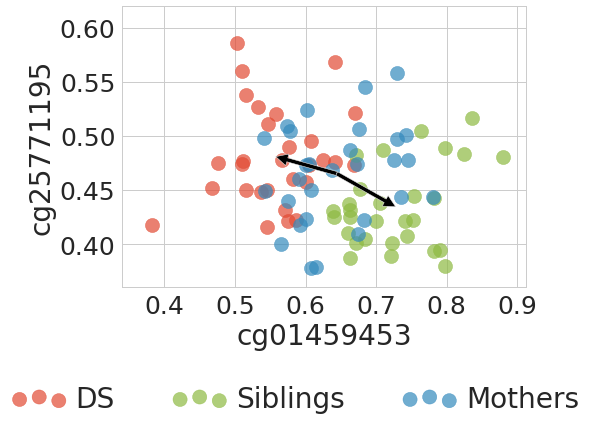

In [199]:
fontsize = 28
fontname = "Proxima Nova Rg"

def scater_down_syndrome(fig, ax, xu, xv, Y, gene_name_u, gene_name_v):
    labels = ['DS', 'Siblings', 'Mothers']
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    ax.set_prop_cycle('color', [colors[0], colors[5], colors[1]])

    for c in [0, 1, 2]:
        ax.scatter(xu[Y == c], xv[Y == c], 200, label = labels[c], alpha=0.7)
    
    #for j in range(len(xu)):
    #    ax.text(xu[j], xv[j], str(j), horizontalalignment='center', verticalalignment='center', fontsize = 15)

    l = fig.legend(framealpha=0.9, fontsize=fontsize, loc=3, # bbox_to_anchor=(0., 1.02, 1., .102), 
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)    
    plt.setp(l.texts, family=fontname)

    
    mean_p = []
    for c in [0, 1, 2]:
        mean_p.append([xu[Y == c].mean(), xv[Y == c].mean()])
    for c in [0, 1]:
        #plt.arrow(mean_p[2][0], mean_p[2][1], mean_p[c][0] - mean_p[2][0], mean_p[c][1] - mean_p[2][1], color = 'k')
        ax.annotate("", xy=(mean_p[c][0], mean_p[c][1]), xycoords='data', xytext=(mean_p[2][0], mean_p[2][1]),  textcoords='data', arrowprops=dict(shrink = 4,facecolor='black'), fontsize=20)

    #k = (mean_p[0][1] - mean_p[2][1]) / (mean_p[0][0] - mean_p[2][0])
    #if abs(k) > k_thr or abs(k) < 1.0 / k_thr:
    #    continue
    #s = "k = {:0.2e}".format(k)
    #plt.text(0.17, 0.95, s, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, fontsize = 50)

    ax.set_xlabel(gene_name_u, fontsize=fontsize, fontname = fontname)
    ax.set_ylabel(gene_name_v, fontsize=fontsize, fontname = fontname)
    fig.subplots_adjust(bottom=0.3, top=0.95, left=0.2, right=0.9)
    plt.xticks(fontsize=25, fontname=fontname)
    plt.yticks(fontsize=25, fontname=fontname)   
    

def genes_pair_plot(X, y, vertices, edges, genes_names):
    #edges = np.concatenate((edges, np.array([edges[:, 1], edges[:, 0]]).T))
    
    import seaborn
    #seaborn.set_style('darkgrid', {'legend.frameon':True})
    seaborn.set_style('whitegrid')
    
    config.params["id_pair"] = param(value_be = 0, value_en = len(edges) - 1, num_ticks = len(edges), name = 'id_pair', manual_ticks = True)
    y = y.flatten()
    pu = -1
    k_thr = 3
    
    for i, e in enumerate(edges):
        config.params["id_pair"].set_tick(i)
        fig = plt.figure(figsize=(8, 6))
        ax = plt.gca()
        #fig.set_visible(not fig.get_visible())
        
        
        u = vertices[e[0]]
        v = vertices[e[1]]
        print u, v, genes_names[u], genes_names[v]
        xu = X[:, u]
        xv = X[:, v]
        
        #xu = (xu - xu.mean()) / xu.std()
        #xv = (xv - xv.mean()) / xv.std()
        
        #mothers_mask = config.params["mothers_mask"].value
        #mongoloids_mask = config.params["mongoloids_mask"].value
        data = np.array([xu, xv]).astype('float32').T
        print data.shape
        
        scater_down_syndrome(fig, ax, xu, xv, y, genes_names[u], genes_names[v])
        #plt.ylim([0, 0.06])
        #pair_genes_path = config.ofname([["kdes", genes_names[u], genes_names[v]]], ext = ".png", include_set = config.params_sets["kdes"])
        #print pair_genes_path
        
        file_name = "\\\\buddha\\In\\" + "cpgs_" + genes_names[u] + "_" + genes_names[v]
        plt.savefig(file_name + ".svg")
        plt.savefig(file_name + ".png")
        break
        #plt.close(fig)

vertices = [cpgname("cg05365729"), cpgname("cg04452713"), cpgname("cg01459453"), cpgname("cg25771195")] #cg25809905 cg09809672 cg26372517
edges = [[2, 3], [0, 1]]
genes_pair_plot(X, y, vertices, edges, cpgs_names)

NameError: name 'pair_genes_path' is not defined

In [35]:
data = cur[:, j].reshape(-1, 1)
num_groups = 5
bins = np.array(np.percentile(data, np.linspace(0, 100, num_groups + 1)))
print data.min(), data.max()
classes = np.minimum(np.digitize(data, bins), num_groups) - 1
classes = classes.flatten()
print feature.shape, classes.shape
print classes == 0
feature[classes == 0]

-1.7247499 1.4657556
(25L,) (25L,)
[False False False  True False False False False False False  True False  True False  True  True
 False False False False False False False False False]


array([ 0,  0,  1,  0,  0])

In [76]:
from configurations.config_down_GSE52588 import config
regressions_path = config.ofname([["down_phenotypes"], ["regressions_fit"]], ext = ".png", 
                                 include_set = config.params_sets["down_phenotypes"])
print regressions_path

F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\down_phenotypes\regressions_fit.png


In [36]:
print u.shape, v.shape, ids.shape
print ids
print p.shape
print p
print p.flatten()[ids]

(29L, 1L) (29L,) (29L, 1L)
[[ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]]
(29L,)
[0.24 -0.16 -0.68 -0.31 1.12 0.21 1.22 0.97 0.47 0.67 -0.09 1.23 0.35 0.99 1.52 -0.00 0.44 0.82 0.92
 2.47 -0.19 1.27 0.48 1.17 0.82 1.28 0.07 0.23 0.49]
[[0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]]


In [67]:
input_feature_assessment(cur[:, ids[:1]], feature, clf)
input_feature_assessment(cur[:, ids[:2]], feature, clf)

(28L, 1L) (28L,)
(28L, 2L) (28L,)


2.5357142857142856

In [29]:
"{:2d}".format(2)

' 2'

In [113]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [44]:
from sklearn import svm, datasets
from scipy import stats
from sklearn import neighbors, ensemble
from sklearn.model_selection import cross_val_score

data = np.array(X)
data = data[:29, :]
print data.shape
#data = data[:29].values
data = stats.zscore(data)

np.set_printoptions(linewidth=100, formatter={'int':lambda x: "{:2d}".format(x), 'float':lambda x: "{:.2f}".format(x)})
feature_names = ["categoriaDSQIID", "fluenzaverbale","ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "fluenzafonemica", "F.A.B."]
for feature_name in feature_names:
    print feature_name
    feature = (phenotype_df[feature_name].values)
    cur = data[~np.isnan(feature)]
    feature = feature[~np.isnan(feature)].astype('int')
    if (feature == 0).sum() < 3:
        continue
    
    print feature, 'good'
    clfs = [svm.SVC(kernel = 'rbf', C = 1, class_weight = "balanced"), 
            neighbors.KNeighborsClassifier(n_neighbors = 2),
            svm.LinearSVC(C = 1, class_weight = "balanced"),
            ensemble.RandomForestClassifier(n_estimators = 4)]

    for clf in clfs:
        score = cross_val_score(clf, cur, feature, cv=5).mean()
        clf.fit(cur, feature)
        predicted = clf.predict(cur)
        score2 = clf.score(cur, feature)
        val = float(np.bincount(feature).max()) / len(feature)
        print predicted, "{:.2f}".format(score), "{:.2f}".format(val), "{:.2f}".format(score2), type(clf).__name__
        
    #break

(29L, 15024L)
categoriaDSQIID
[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0  1  0  0  1  0  0  0  0] good
[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0  1  0  0  1  0  0  0  0] 0.76 0.79 1.00 SVC
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0] 0.68 0.79 0.86 KNeighborsClassifier
[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0  1  0  0  1  0  0  0  0] 0.18 0.79 1.00 LinearSVC
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0  1  0  0  1  0  0  0  0] 0.80 0.79 0.97 RandomForestClassifier
fluenzaverbale
[ 0  1  1  0  1  1  0  0  0  1  0  1  1  2  0  0  1  0  2  0  0  0  0  0  2] good
[ 0  1  1  0  1  1  0  0  0  1  0  1  0  2  0  0  1  0  2  0  0  0  0  0  2] 0.65 0.56 0.96 SVC
[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2] 0.48 0.56 0.68 KNeighborsClassifier
[ 0  1  1  0  1  1  0  0  0  1  0  1  1  2  0  0  1  0  2  0  0  0  0  0  2] 0.13 0.56 1.00 Line

In [24]:
import time
from tqdm import tqdm
for i in tqdm(range(100)):
    time.sleep(1)

100%|██████████| 100/100 [01:40<00:00,  1.00s/it]


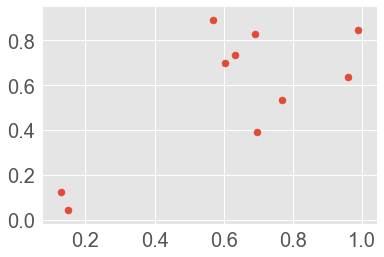

In [18]:
#py.sign_in('mike_live', 'rfHatoUPaLpzIMHQJKYK')

plt.scatter(np.random.rand(10, 1), np.random.rand(10, 1))

np.savez('tmp.npz', fig = plt.gcf())
#plot_url = py.plot_mpl(plt.gcf())

import pickle
pickle.dump(plt.gcf(), open('FigureObject.fig.pickle', 'wb'))

In [19]:
import pickle
figx = pickle.load(open('FigureObject.fig.pickle', 'rb'))

figx.show()

AttributeError: 'module' object has no attribute 'new_figure_manager_given_figure'

# Epimutations per phenotype

In [7]:
def plot_per_phenotype(x, y, label_x = '', label_y = '', title = ''):
    plt.figure(figsize=(10, 5))
    ax = plt.axes()
    ax.scatter(x, y, alpha = 0.5, linewidth = 3)
    plt.xlabel(label_x, fontsize = fontsize)
    plt.ylabel(label_y, fontsize = fontsize)
    plt.title(title, fontsize = 1.2 * fontsize)
    plt.subplots_adjust(bottom=0.2, top=0.9, left=0.2, right=0.95)
    #plt.show()
    
def plot_per_phenotypes(new_feature, path_pdf, label = '', title = ''):
    feature_names = ["categoriaDSQIID", "fluenzaverbale","ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "fluenzafonemica", "F.A.B."]
    #feature_names = phenotype_df.columns.values
    from matplotlib.backends.backend_pdf import PdfPages
    
    with PdfPages(path_pdf) as pdf:
        for feature_name in feature_names:
            print (feature_name)
            feature = (phenotype_df[feature_name].values)
            cur = new_feature[~np.isnan(feature)]
            feature = feature[~np.isnan(feature)].astype('int')
            plot_per_phenotype(cur, feature, label_x = label, label_y = feature_name, title = title)
            pdf.savefig()
            plt.close()
            

df = pd.read_csv(config.ifname('epimutations'))
path_pdf = config.ofname([["down_epimutations"], ["epimutation", "phenotypes", "small"]], ext = ".pdf", 
                                                 include_set = config.params_sets["down_epimutations"])
plot_per_phenotypes(df["epimutations_sum"].values[:29], path_pdf, 'Number of epimutations')

categoriaDSQIID
fluenzaverbale
ABCiperattivita
ABCIrritabilita
ABCletargia
ABCstereotipie
ABCinappropriatespeech
fluenzafonemica
F.A.B.


# Age per epimutations

In [47]:
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNet
groups = ["mongoloids_mask", "siblings_mask", "mothers_mask"]
group_masks = [0] * 3
for j, group_name in enumerate(groups):
    group_masks[j] = config.params[group_name].value

def plot_per_feature(x, y, group_masks, label_x = '', label_y = '', title = ''):
    colors = ['r', 'g', 'b']
    plt.figure(figsize=(10, 8))
    ax = plt.axes()
    for j, mask in enumerate(group_masks):
        cx = np.log(x[mask])
        cy = y[mask]#.reshape(-1, 1)
        print(cx.shape, cy.shape)
        cy = cy[~np.isnan(cx)]
        cx = cx[~np.isnan(cx)]
        
        cy = cy.reshape(-1, 1)
        ax.scatter(cy, np.exp(cx), c = colors[j], alpha = 0.5, linewidth = 3)
        model = LinearRegression().fit(cy, cx)
        r_sq = model.score(cy, cx)
        print(model.coef_)
        ax.plot(cy, np.exp(model.predict(cy)), c = colors[j])
        title += ' (' +  "{:0.3f}".format(r_sq) + ')'
    
    plt.yscale('log')
    plt.xlabel(label_y, fontsize = fontsize)
    plt.ylabel(label_x, fontsize = fontsize)
    plt.title(title, fontsize = 1.2 * fontsize)
    plt.legend(["Down", "Siblings", "Mothers"])
    plt.subplots_adjust(bottom=0.2, top=0.9, left=0.2, right=0.95)
    #plt.show()            

df = pd.read_csv(config.ifname('epimutations'))
patients_info = pd.read_csv(config.ifname("patients_info"), delimiter='\t')
age = patients_info["age"].values
epimutations_sum = df["epimutations_sum"].values
path_epimutations_age = config.ofname([["down_epimutations"], ["epimutation", "age"]], ext = ".pdf", 
                                                 include_set = config.params_sets["down_epimutations"])
epimutations_sum = epimutations_sum.astype('float')
#epimutations_sum[epimutations_sum > 5000] = np.NaN
plot_per_feature(epimutations_sum, age, group_masks, 'Number of epimutations', 'Age')
plt.savefig(path_epimutations_age)
plt.close()

(29,) (29,)
[0.01427872]
(29,) (29,)
[-0.02116727]
(29,) (29,)
[0.01855536]
